# Machine, Data and Learning: Assignment 1 

Assignment 1: Question 1

**Animesh Sinha (2018113001)**

**Mukund Choudhary (2018114015)**

## Loading the Data

We start by loading the data into Numpy Arrays and Pandas DataFrames, and plotting the basic structure of it all. Some sampling, shuffling and splitting is done as we were tasked in the problem statement.

In [1]:
import pickle
from sklearn import model_selection, linear_model
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data1 = pickle.load(open('Q1_data/data.pkl', 'rb'))
print('Data-1 is', type(data1), 'of shape', data1.shape)
x_org, y_org = data1[:, 0], data1[:, 1]

Data-1 is <class 'numpy.ndarray'> of shape (5000, 2)


In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_org, y_org, test_size=1/10, random_state=42, shuffle=True)
set_ranges = [((len(x_train) * i) // 10, (len(x_train) * (i + 1)) // 10) 
              for i in range(10)]
print('Split Ranges:', set_ranges)
print('X_train:', x_train.shape, 'X_test:', x_test.shape,
      'Y_train:', y_train.shape, 'Y_test:', y_test.shape)

Split Ranges: [(0, 450), (450, 900), (900, 1350), (1350, 1800), (1800, 2250), (2250, 2700), (2700, 3150), (3150, 3600), (3600, 4050), (4050, 4500)]
X_train: (4500,) X_test: (500,) Y_train: (4500,) Y_test: (500,)


In [4]:
def k_poly(x: np.ndarray, k:int):
    return np.array([x ** i for i in range(k)]).T

print(k_poly(x_train[:3], 4))

[[1.00000000e+00 3.71600000e+00 1.38086560e+01 5.13129657e+01]
 [1.00000000e+00 3.77900000e+00 1.42808410e+01 5.39672981e+01]
 [1.00000000e+00 1.35000000e-01 1.82250000e-02 2.46037500e-03]]


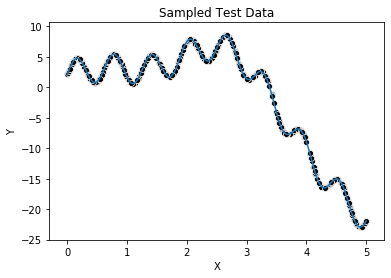

In [5]:
sns.lineplot(x_org, y_org)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Given Data')
sns.scatterplot(x_test, y_test, color='Black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Test Data')
plt.show()

## Building the Models

We start off writing the models and getting their bias and variance in our DataFrames and Matrices.

In [6]:
model = [
    [linear_model.LinearRegression().fit(
            k_poly(x_train[group[0]:group[1]], order),
            y_train[group[0]:group[1]]) 
        for group in set_ranges 
    ] for order in range(1, 10)
]

In [7]:
# Use model[order - 1][train_group]
def predict(x, group, order):
    assert 1 <= order <= 9 and 0 <= group < 10
    return model[order - 1][group].predict(k_poly(x, order))

predict(np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), group=2, order=1)

array([-0.46048986, -0.46048986, -0.46048986, -0.46048986, -0.46048986,
       -0.46048986, -0.46048986, -0.46048986, -0.46048986, -0.46048986])

In [8]:
data = {'x_test': x_test, 'y_test': y_test}
data.update({'g' + str(g) + '_o' + str(o): predict(x_test, g, o) 
             for o in range(1, 10) for g in range(10)})
res = pd.DataFrame(data)
res.head()

,x_test,y_test,g0_o1,g1_o1,g2_o1,g3_o1,g4_o1,g5_o1,g6_o1,g7_o1,...,g0_o9,g1_o9,g2_o9,g3_o9,g4_o9,g5_o9,g6_o9,g7_o9,g8_o9,g9_o9
0,1.501,4.747472,-2.208321,-1.750893,-0.46049,-1.980961,-1.472493,-1.502908,-1.633663,-2.034367,...,3.444255,3.169817,3.287615,3.463468,3.317010,3.383225,3.562258,3.481125,3.419127,2.923535
1,2.586,8.051740,-2.208321,-1.750893,-0.46049,-1.980961,-1.472493,-1.502908,-1.633663,-2.034367,...,6.698068,5.998404,6.368745,6.284851,6.576971,6.436159,6.203622,6.655749,6.600640,6.638842
2,2.653,8.563659,-2.208321,-1.750893,-0.46049,-1.980961,-1.472493,-1.502908,-1.633663,-2.034367,...,6.477295,5.811531,6.168126,6.102487,6.383392,6.225258,6.000243,6.418023,6.388301,6.419069
3,1.055,0.869380,-2.208321,-1.750893,-0.46049,-1.980961,-1.472493,-1.502908,-1.633663,-2.034367,...,2.867189,2.602442,2.786065,3.011560,2.967517,3.021211,3.033886,3.249377,2.867133,2.618622
4,0.705,4.773472,-2.208321,-1.750893,-0.46049,-1.980961,-1.472493,-1.502908,-1.633663,-2.034367,...,3.053474,2.732525,2.981546,2.984270,2.890026,3.090860,3.044855,3.539670,3.040100,3.163848


In [9]:
def get_bias_variance(order):
    keys = ['g' + str(group) + '_o' + str(order) for group in range(10)]
    data = np.array([res[key].values for key in keys])
    variance = np.var(data, axis=0)
    bias = np.abs(np.mean(data, axis=0) - res['y_test'].values)
    return (np.mean(bias), np.mean(variance), np.sqrt(np.mean(bias ** 2)))

get_bias_variance(order=1)

(7.122245876924875, 0.2305768224455912, 8.426644480264207)

## Analyzing Bias and Variance

We are plotting Bias and Variance for each model and against model size to see if the trends are satisfied.
We expect that:
* The Smaller Models will be High Bias and Low Variance since it has very little space to produce varying outputs, i.e. The function it learns will be simple. But bias is huge cause it didn't really learn a lot.
* The Bigger Models will be High Variance and Low Bias since it can overfit the data getting the mean almost perfectly equal, but have huge deviations due to learning too complex a function on different inputs.

In [10]:
bias_var_map = np.array([get_bias_variance(order) for order in range(1, 10)])
bias_map = np.array([x[0] for x in bias_var_map])
var_map = np.array([x[1] for x in bias_var_map])
bssq_map = np.array([x[2] for x in bias_var_map])
print('Bias Squared:', bssq_map, '\nVariance', var_map)

Bias Squared: [8.42664448 5.58310943 2.50734803 2.26971999 1.78776372 1.73385515
 1.6323045  1.59482719 1.57979867] 
Variance [0.23057682 0.125499   0.04867627 0.06035151 0.03968561 0.03433913
 0.03470343 0.03751208 0.04354868]


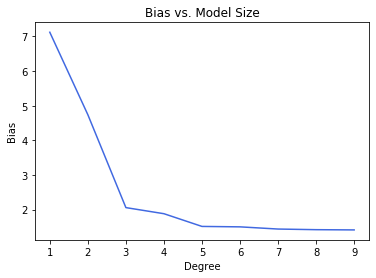

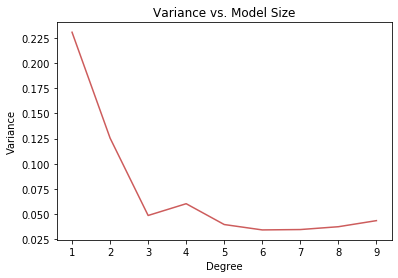

In [11]:
sns.lineplot(np.arange(1, 10), bias_map, color='RoyalBlue')
plt.ylabel('Bias')
plt.xlabel('Degree')
plt.title('Bias vs. Model Size')
plt.show()
sns.lineplot(np.arange(1, 10), var_map, color='IndianRed')
plt.ylabel('Variance')
plt.xlabel('Degree')
plt.title('Variance vs. Model Size')
plt.show()

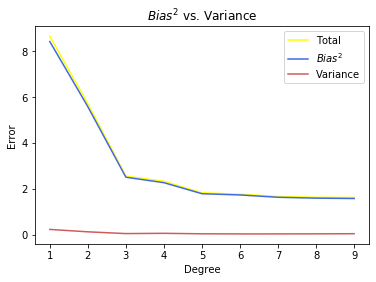

In [12]:
sns.lineplot(np.arange(1, 10), bssq_map + var_map, color='Yellow')
sns.lineplot(np.arange(1, 10), bssq_map, color='RoyalBlue')
sns.lineplot(np.arange(1, 10), var_map, color='IndianRed')
plt.legend(['Total', '$Bias^2$', 'Variance'])
plt.ylabel('Error')
plt.xlabel('Degree')
plt.title('$Bias^2$ vs. Variance')
plt.show()

## Check the Model's Predictions

One final run to see how the models, on average are fitting the data

Making Graphs: .........

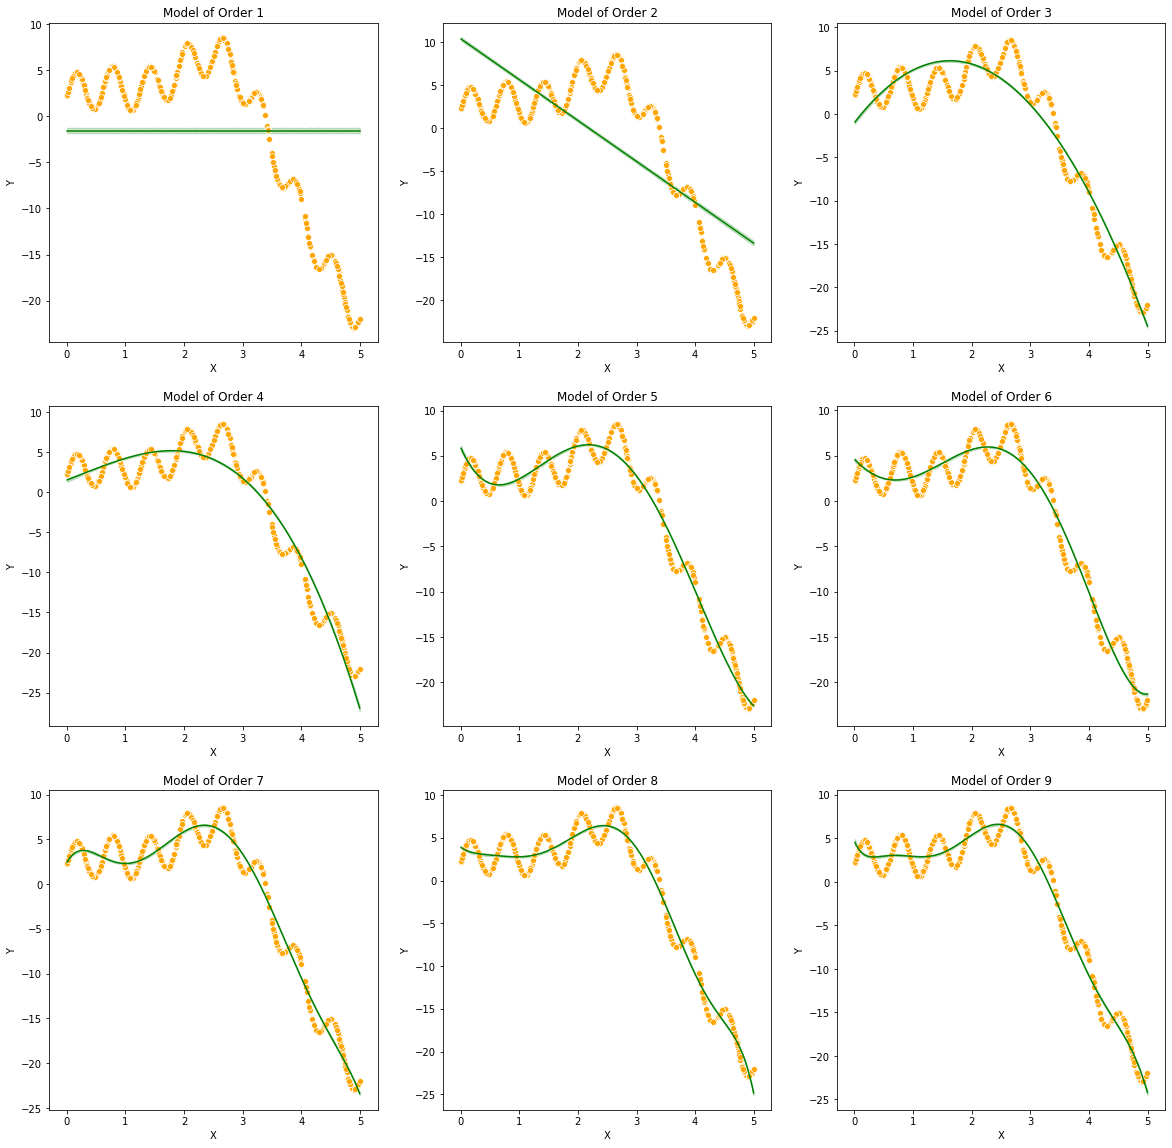

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax = ax.reshape(-1)
print('Making Graphs: ', end='', flush=True)
for order in range(1, 10):
    pred = np.array([
        model[order - 1][group].predict(k_poly(x_test, order)) 
        for group in range(10)])
    ptest = np.mean(pred, axis=0)
    xfull, yfull = np.concatenate([x_test for i in range(10)]), pred.reshape(-1)
    print('.', end='', flush=True)
    sns.lineplot(xfull, yfull, ax=ax[order-1], color='Green')
    sns.scatterplot(x_test, y_test, ax=ax[order-1], color='Orange')
    ax[order - 1].set_title('Model of Order ' + str(order))
    ax[order - 1].set_xlabel('X')
    ax[order - 1].set_ylabel('Y')
plt.show()

## The Final Answers


The Variance is bizzarly decreasing with the increase in complexity of the model. This is because of the way the dataset is structured. There is little to **no noise in the data**, all the data follows a very regular distribution, which is approximated by all the models almost equally well and in the same fashion. This would be very different if there was a lot of noise in the data.

The **Smallest Agent are both High Bias and High Variance** as they can neither approximate well nor correctly, the approximations keep changing. The Wavy nature of the curve allows for multiple lines of best fit.

We also see that **after decreasing the variance increases a little bit**. This is where the models are actually becoming powerful, and are overfitting a little. However, until we take a 17 degree model, we will not overfit too much. The first **minima is reached at order 5** (3 inflection points in the overall structure), and the next minima will be hit **at order 17**, which will probably be the true global minima.

Also, in the Bias vs. Variance plots, the variance is negligible compared to the bias, since our model is way too low order (all models where degree is much lower than 17 will be very high bias to variance).